In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import wget

## Get the dataset
Download from my github, I have upload the cleaned dataset to my github, so, In this assignment, I needn't clean it again. And use the wget module in python to download it in the current directory, If that doesn't work, please check your connection, and the wget module is necessary

In [2]:
print('Beginning file download with wget module')
url = 'https://raw.githubusercontent.com/wlof-2/Statistic_Machine_Learning_Course/main/data/AUS_Weather.csv'
wget.download(url, './data.csv')
# dataset = pd.read_csv('./data.csv')
dataset = pd.read_csv('./data/AUS_Weather_new.csv')
# save the dataset file with the path './data.csv'

Beginning file download with wget module
100% [........................................................................] 18145196 / 18145196

In [3]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Cobar,17.9,10.794898,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1.050124e+11,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02,Cobar,18.4,9.343202,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1.077002e+11,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04,Cobar,19.4,11.318483,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1.074537e+11,1009.2,1.0,6.0,28.7,34.9,No,No
3,2009-01-05,Cobar,21.9,11.489848,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1.076180e+11,1009.1,1.0,5.0,29.1,35.6,No,No
4,2009-01-06,Cobar,24.2,12.036622,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1.067986e+11,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Darwin,19.3,10.392230,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1.081118e+11,1010.5,0.0,1.0,24.5,32.3,No,No
56416,2017-06-21,Darwin,21.2,10.210326,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1.084007e+11,1011.2,7.0,0.0,24.8,32.0,No,No
56417,2017-06-22,Darwin,20.7,10.255977,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1.086901e+11,1011.8,0.0,0.0,24.8,32.1,No,No
56418,2017-06-23,Darwin,19.5,10.026524,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1.085246e+11,1010.7,1.0,1.0,24.8,29.2,No,No


## General description of the dataset
This dataset contains about 10 years of daily weather observations from many locations across Australia. RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more. And the feature is some weather information today, for example, temperature, wind, sunshine etc.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
Date             56420 non-null object
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RainTomorrow     

In [5]:
# Encode object type labels with value between 0 and n_classes-1 to calculate the standard deviations of these features. However, the means, min, max of these variables actually are meaningless.
le =  LabelEncoder()
for i in dataset:
    if dataset[i].dtype=='object':
        dataset[i] = le.fit_transform(dataset[i])
    else:
        continue

In [6]:
print(dataset.dtypes)

Date               int32
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object


In [7]:
# For some variables, such as locations, it is categorical variable, and we encode it with number, so, when analysis the means, standard deviations, min and max values fo the variables, we should analysis categorical type and numerical type respectively.
categorical = [i for i in dataset.columns if dataset[i].dtype=='int32']
numerical = [i for i in dataset.columns if dataset[i].dtype=='float64' or dataset[i].dtype=='int64']

In [8]:
dataset[numerical].mean()

MinTemp          1.346477e+01
MaxTemp          8.062002e+00
Rainfall         2.130397e+00
Evaporation      5.503135e+00
Sunshine         7.735626e+00
WindGustSpeed    4.087737e+01
WindSpeed9am     1.566723e+01
WindSpeed3pm     1.978678e+01
Humidity9am      6.587412e+01
Humidity3pm      4.960199e+01
Pressure9am      1.095229e+11
Pressure3pm      1.014796e+03
Cloud9am         4.241705e+00
Cloud3pm         4.326515e+00
Temp9am          1.820496e+01
Temp3pm          2.271033e+01
dtype: float64

In [9]:
dataset[numerical].max()

MinTemp          3.140000e+01
MaxTemp          1.345947e+01
Rainfall         2.062000e+02
Evaporation      8.120000e+01
Sunshine         1.450000e+01
WindGustSpeed    1.240000e+02
WindSpeed9am     6.700000e+01
WindSpeed3pm     7.600000e+01
Humidity9am      1.000000e+02
Humidity3pm      1.000000e+02
Pressure9am      1.194517e+11
Pressure3pm      1.038900e+03
Cloud9am         8.000000e+00
Cloud3pm         9.000000e+00
Temp9am          3.940000e+01
Temp3pm          4.610000e+01
dtype: float64

In [10]:
dataset[numerical].min()

MinTemp         -6.700000e+00
MaxTemp          1.191650e+00
Rainfall         0.000000e+00
Evaporation      0.000000e+00
Sunshine         0.000000e+00
WindGustSpeed    9.000000e+00
WindSpeed9am     2.000000e+00
WindSpeed3pm     2.000000e+00
Humidity9am      0.000000e+00
Humidity3pm      0.000000e+00
Pressure9am      9.498010e+10
Pressure3pm      9.771000e+02
Cloud9am         0.000000e+00
Cloud3pm         0.000000e+00
Temp9am         -7.000000e-01
Temp3pm          3.700000e+00
dtype: float64

In [11]:
dataset.std()

Date             8.529748e+02
Location         7.301231e+00
MinTemp          6.416689e+00
MaxTemp          1.826156e+00
Rainfall         7.014822e+00
Evaporation      3.696282e+00
Sunshine         3.758153e+00
WindGustDir      4.792305e+00
WindGustSpeed    1.333523e+01
WindDir9am       4.660823e+00
WindDir3pm       4.711700e+00
WindSpeed9am     8.317005e+00
WindSpeed3pm     8.510180e+00
Humidity9am      1.851329e+01
Humidity3pm      2.019704e+01
Pressure9am      2.874106e+09
Pressure3pm      6.870892e+00
Cloud9am         2.797162e+00
Cloud3pm         2.647251e+00
Temp9am          6.567991e+00
Temp3pm          6.836543e+00
RainToday        4.148428e-01
RainTomorrow     4.144248e-01
dtype: float64

### Means, standard deviations, min and max values of variables
1. we find that Location and WindGustSpeed have relatively large standard deviations, for location, the climate of different area are usually different, so, some areas may often rains, but others never, such as  desert. For the WindGustSpeed, because the gust usually have different strength, so, they have big difference at different day. We can see windspeed's standard deviations are smaller than the WindGustSpeed    
2. Humidity9am and Humidity3am have the biggest standard deviations, I think because the humidity could be affected by many factor, for example, the humidity different in sunny and rainy day, also very different in desert and forest.   
3. For the temperature, the max and min different a lot, this might be different in different climate.   
4. Rainfall's max is very large, and min is relatively small, but the standard deviations is relatively small, and means is also small, This means that the rainfall is at a relatively stable level throughout the year. And the Evaporation is similiar with the Rainfall.  
5. We can see, the sunshine is relatively stable, and the Cloud is similiar.        
6. Pressure is different in different day but the different is not large.    
7. some information for the standard deviations also have no means, for example, the day which is about date.

## Explanations of the most important variables
From the above analysis, we can see, some variables are very important, such as Humidity, windspeed, but some variables we can see make no contribution, these variables we could drop out, and the others are important variables. Some variables have no relationship with weather making no contribution in this problem, for example, 'Date', 'Day', 'Month', 'Year', and some variables are too stable, therefore they have little contribution to the result, such as 'Sunshine', 'Cloud', and 'Evaporation', so we drop these variables, and get the important variables. For the 'RainTomorrow', we deal it as target.

In [12]:
dataset_important = dataset.drop(['Date', 'RainTomorrow', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1)
RainTomorrow = dataset.loc[:, ['RainTomorrow']]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

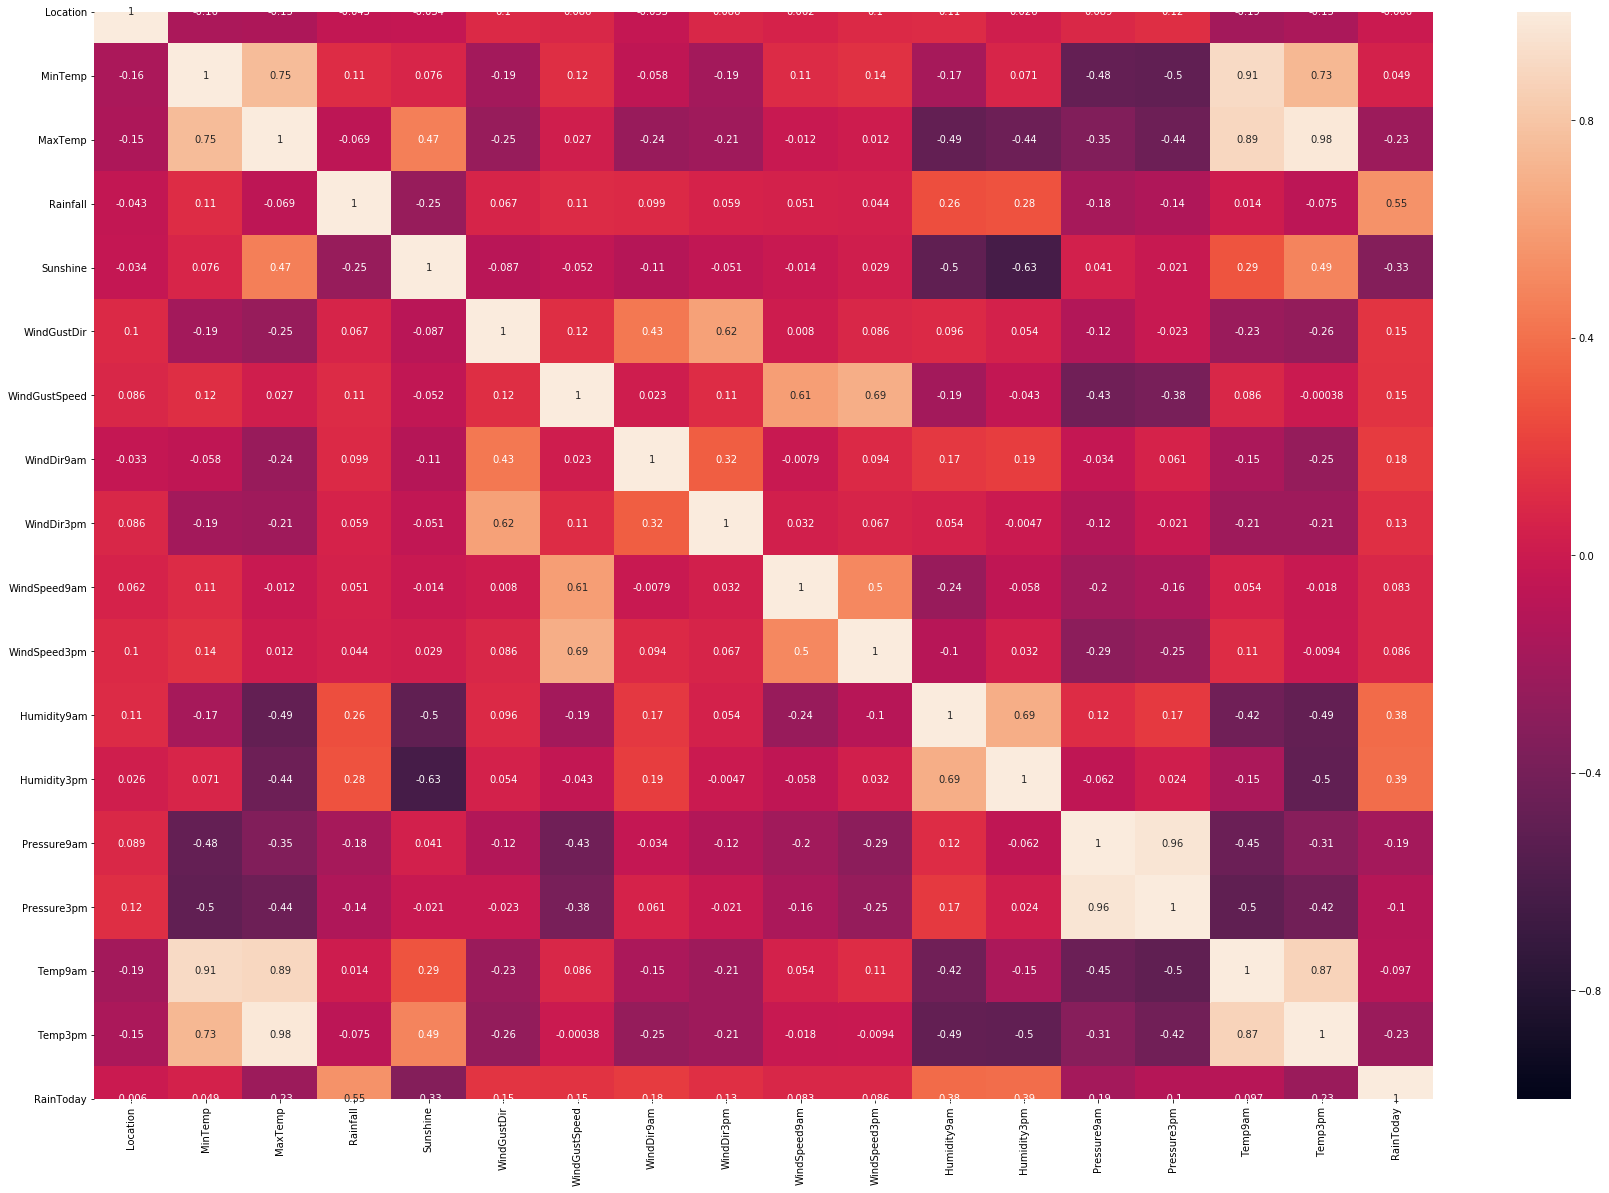

In [14]:
# Correlations between the most important variables between each other
plt.figure(figsize=(30,20))
heatmap = sns.heatmap(dataset_important.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

## Analysis of Correlations    
We analyze the Correlations in descending order   
1. Temp9am(89%) and Temp3pm(98%) has high correlation with MaxTemp, This may be caused by little temperature change during the day.   
2. Windspeed9am(58%) and Windspeed3pm(66%) has relatively high correlation with WindGustSpeed, because wind allways comes with the Gust wind    
3. WindDir9am(35%) and WindDir3pm(56%) has relatively high correlation with WindDir, because the wind direction hardly change in the day.   
4. Humidity9am and Humidity3pm also has not low correlation with the rainfall, because in rainy day, these variable will be high

In [15]:
dataset_important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
Location         56420 non-null int32
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null int32
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null int32
WindDir3pm       56420 non-null int32
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null int32
dtypes: float64(13), int32(5)
memory usage: 6.7 MB


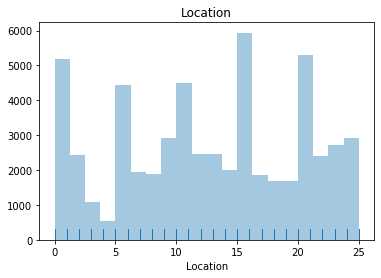

In [16]:
Location = dataset_important['Location']
sns.distplot(Location, bins=20, hist=True, kde=False, norm_hist=False, rug=True,
             vertical=False, axlabel=None, label=None, ax=None,
             fit=None)
plt.title('Location')
plt.show()

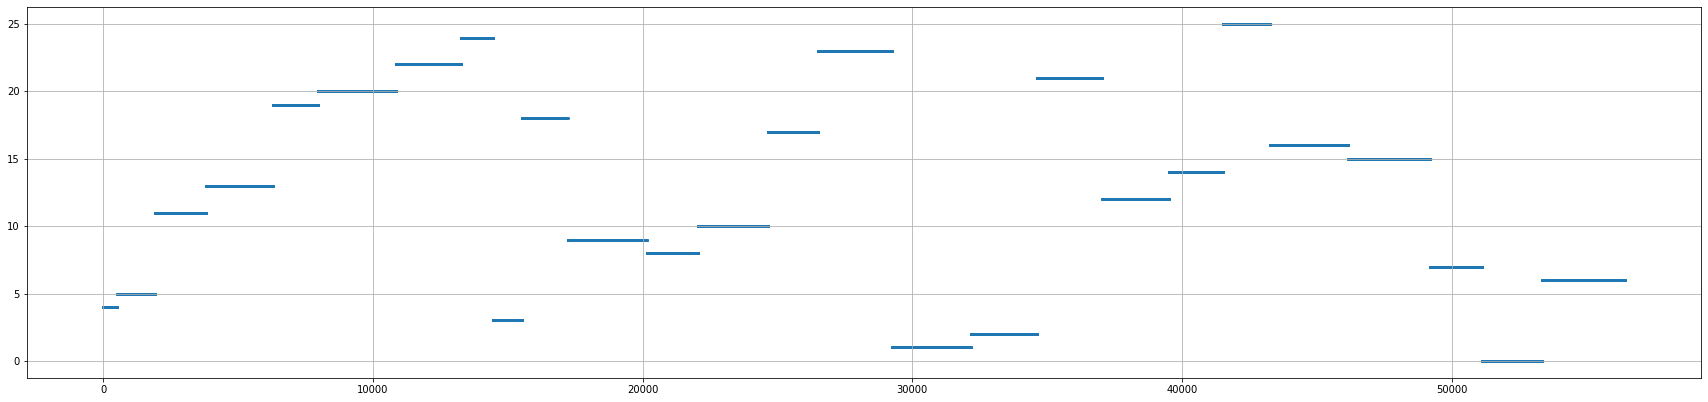

In [17]:
distplot = dataset_important['Location']
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(2,1,1)  # 创建子图1
ax1.scatter(distplot.index, distplot.values, s =4)
plt.grid()

From the histogram and scatter plot, for the distribution of Location, we could know it is Discretely distributed.

## Analysis of the variables' distribution

In [18]:
# Determine whether the continuous variable conforms to the normal distribution
from scipy import stats
for i in dataset_important.columns:
    if dataset_important[i].dtype=='float64':
        u = dataset_important[i].mean()
        std = dataset_important[i].std()
        print(i)
        print(stats.kstest(dataset_important[i], 'norm', (u, std))) 

MinTemp
KstestResult(statistic=0.03687693060402991, pvalue=4.546367104062726e-67)
MaxTemp
KstestResult(statistic=0.04237575858465614, pvalue=2.0002910298612654e-88)
Rainfall
KstestResult(statistic=0.3806784727530288, pvalue=0.0)
Sunshine
KstestResult(statistic=0.10274948707268283, pvalue=0.0)
WindGustSpeed
KstestResult(statistic=0.0963193895657044, pvalue=0.0)
WindSpeed9am
KstestResult(statistic=0.10569797656470986, pvalue=0.0)
WindSpeed3pm
KstestResult(statistic=0.09849545859999254, pvalue=0.0)
Humidity9am
KstestResult(statistic=0.03845852345099543, pvalue=6.586033772169299e-73)
Humidity3pm
KstestResult(statistic=0.027706929943831116, pvalue=4.792490855941289e-38)
Pressure9am
KstestResult(statistic=0.013432667686337885, pvalue=2.87470900911113e-09)
Pressure3pm
KstestResult(statistic=0.013125467733473783, pvalue=7.217974821228958e-09)
Temp9am
KstestResult(statistic=0.04104336889999116, pvalue=5.596662485309171e-83)
Temp3pm
KstestResult(statistic=0.04220967703674394, pvalue=9.7618120201

we can see some numerical variables are the normal distribution because in the Kolmogorov-Smirnov test, the P value is bigger than 0.05, these variables are, 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', for the variables that don't conform to the normal distribution, we can analyze them by histogram and scatter plot.

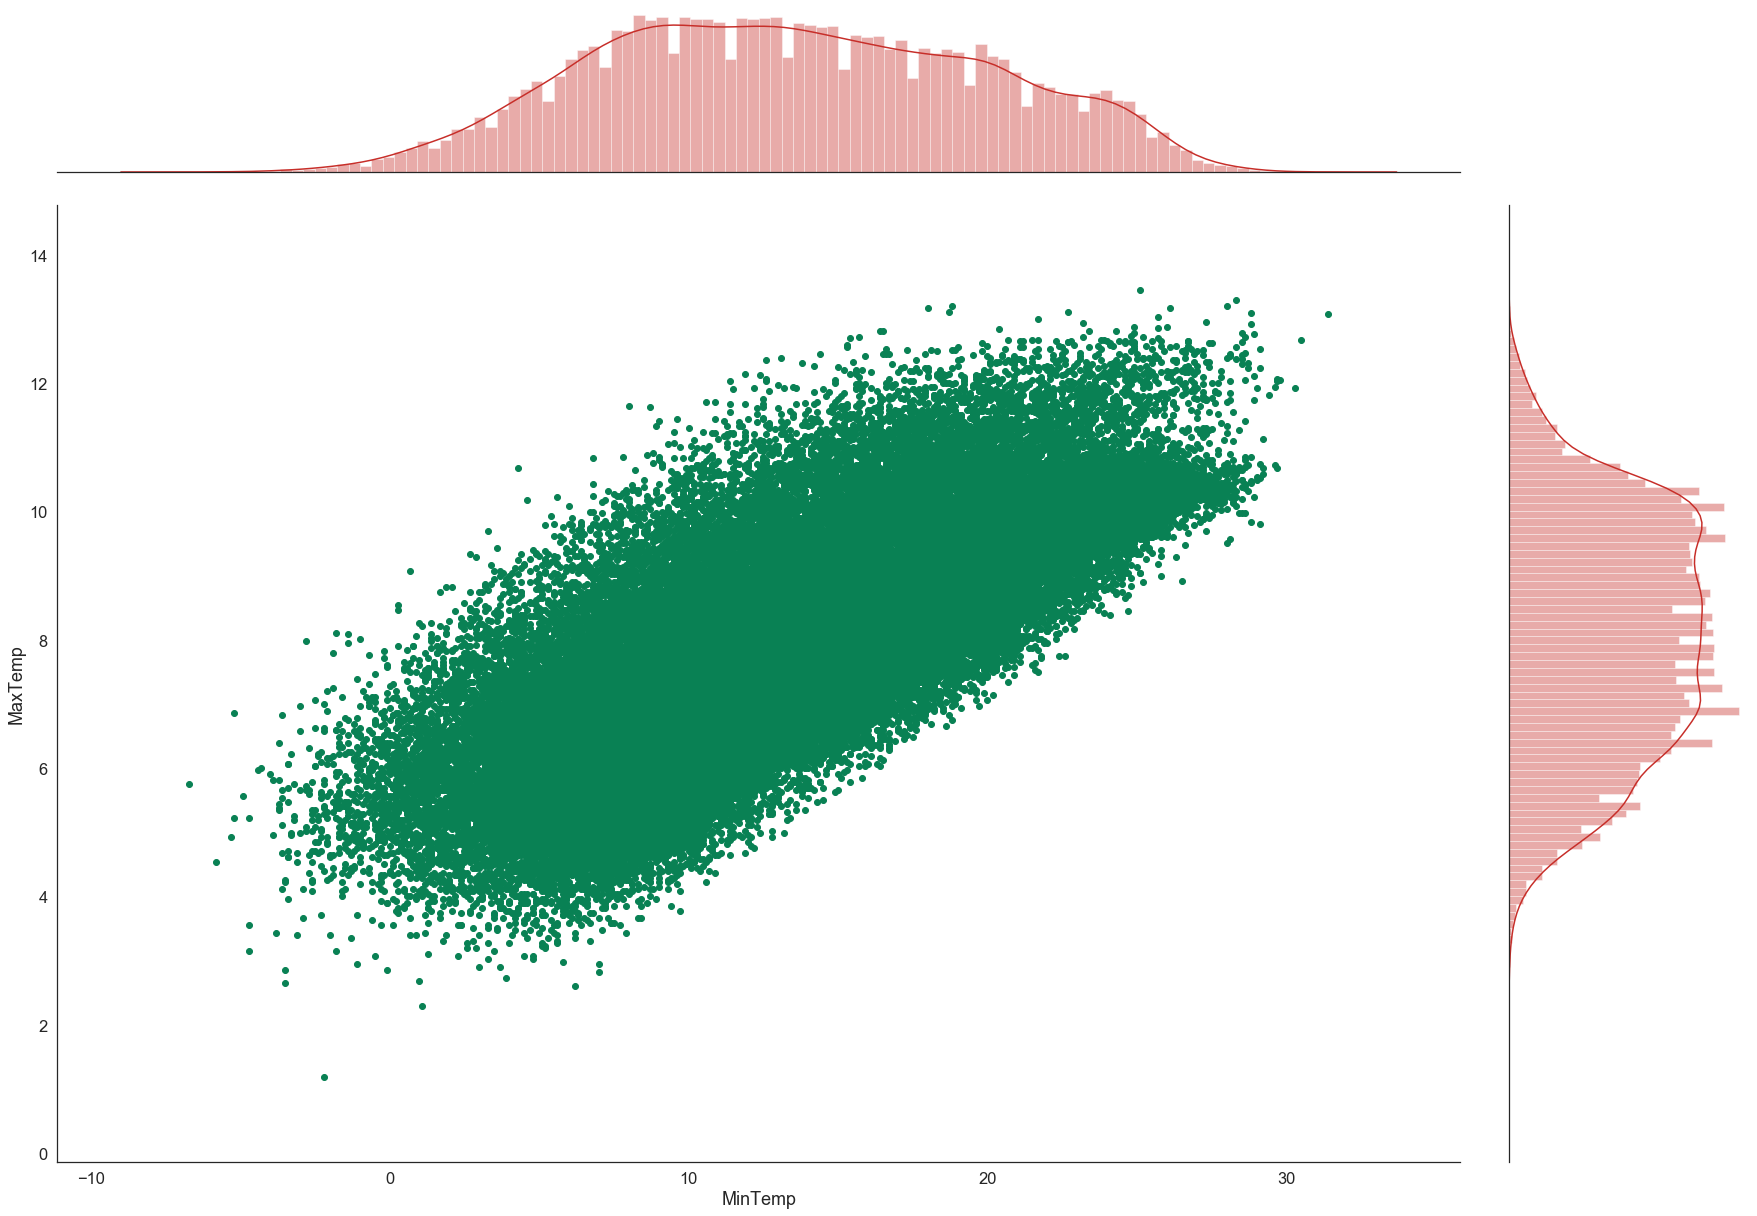

In [19]:
# The histogram and scatter plot of MaxTemp and MinTemp
sns.set(style="white",font_scale=1.5) 
g = sns.jointplot(x='MinTemp', y='MaxTemp', data=dataset_important, 
                 color='#098154', 
                 marginal_kws=dict(bins=100,  
                                    kde=True, 
                                    color='#c72e29',                         
                                   ),
                 )
g.fig.set_size_inches(30,20) 

From the histogram and scatter plot of MaxTemp and MinTemp, we can see the nuclear density map of these two variables, and find that the similarity between the curve and the normal distribution curve. For the scatter, we can see some node are deviated from the right track, I think it might because when I deal with the original data, some data are lost, so, I replaced them by the means of the variables.

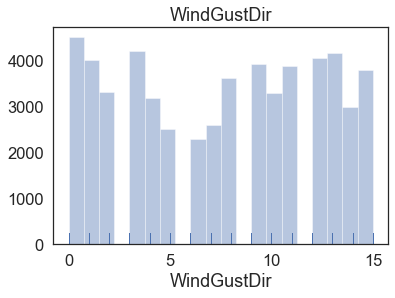

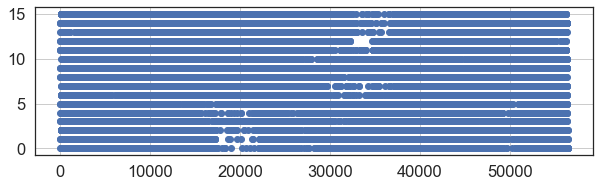

In [20]:
WindGustDir = dataset_important['WindGustDir']
sns.distplot(WindGustDir, bins=20, hist=True, kde=False, norm_hist=False, rug=True,
             vertical=False, axlabel=None, label=None, ax=None,
             fit=None)
plt.title('WindGustDir')
plt.show()

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  
ax1.scatter(WindGustDir.index, WindGustDir.values)
plt.grid()

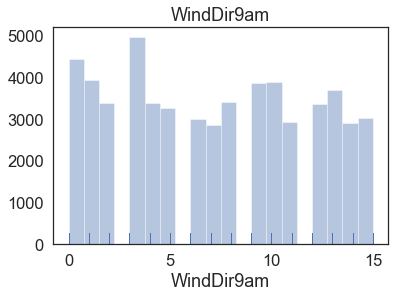

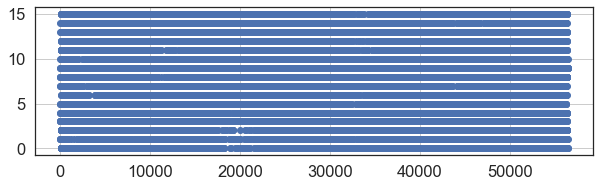

In [21]:
WindDir9am = dataset_important['WindDir9am']
sns.distplot(WindDir9am, bins=20, hist=True, kde=False, norm_hist=False, rug=True,
             vertical=False, axlabel=None, label=None, ax=None,
             fit=None)
plt.title('WindDir9am')
plt.show()

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  
ax1.scatter(WindDir9am.index, WindDir9am.values)
plt.grid()

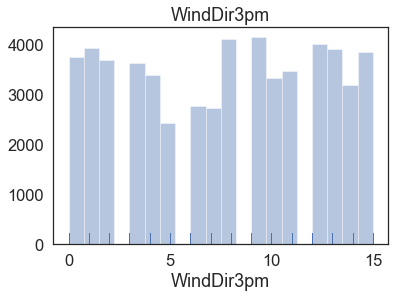

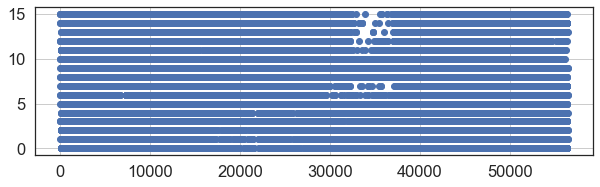

In [22]:
WindDir3pm = dataset_important['WindDir3pm']
sns.distplot(WindDir3pm, bins=20, hist=True, kde=False, norm_hist=False, rug=True,
             vertical=False, axlabel=None, label=None, ax=None,
             fit=None)
plt.title('WindDir3pm')
plt.show()

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  
ax1.scatter(WindDir3pm.index, WindDir3pm.values)
plt.grid()

Because the WindGustDir are categorical varibale, we can get an information is that, the wind direction have a high probability of pointing in a direction, this might have relation to the climate of Australia. And the WindDir9am, WindDir3pm is similiar with the WindGustDir.

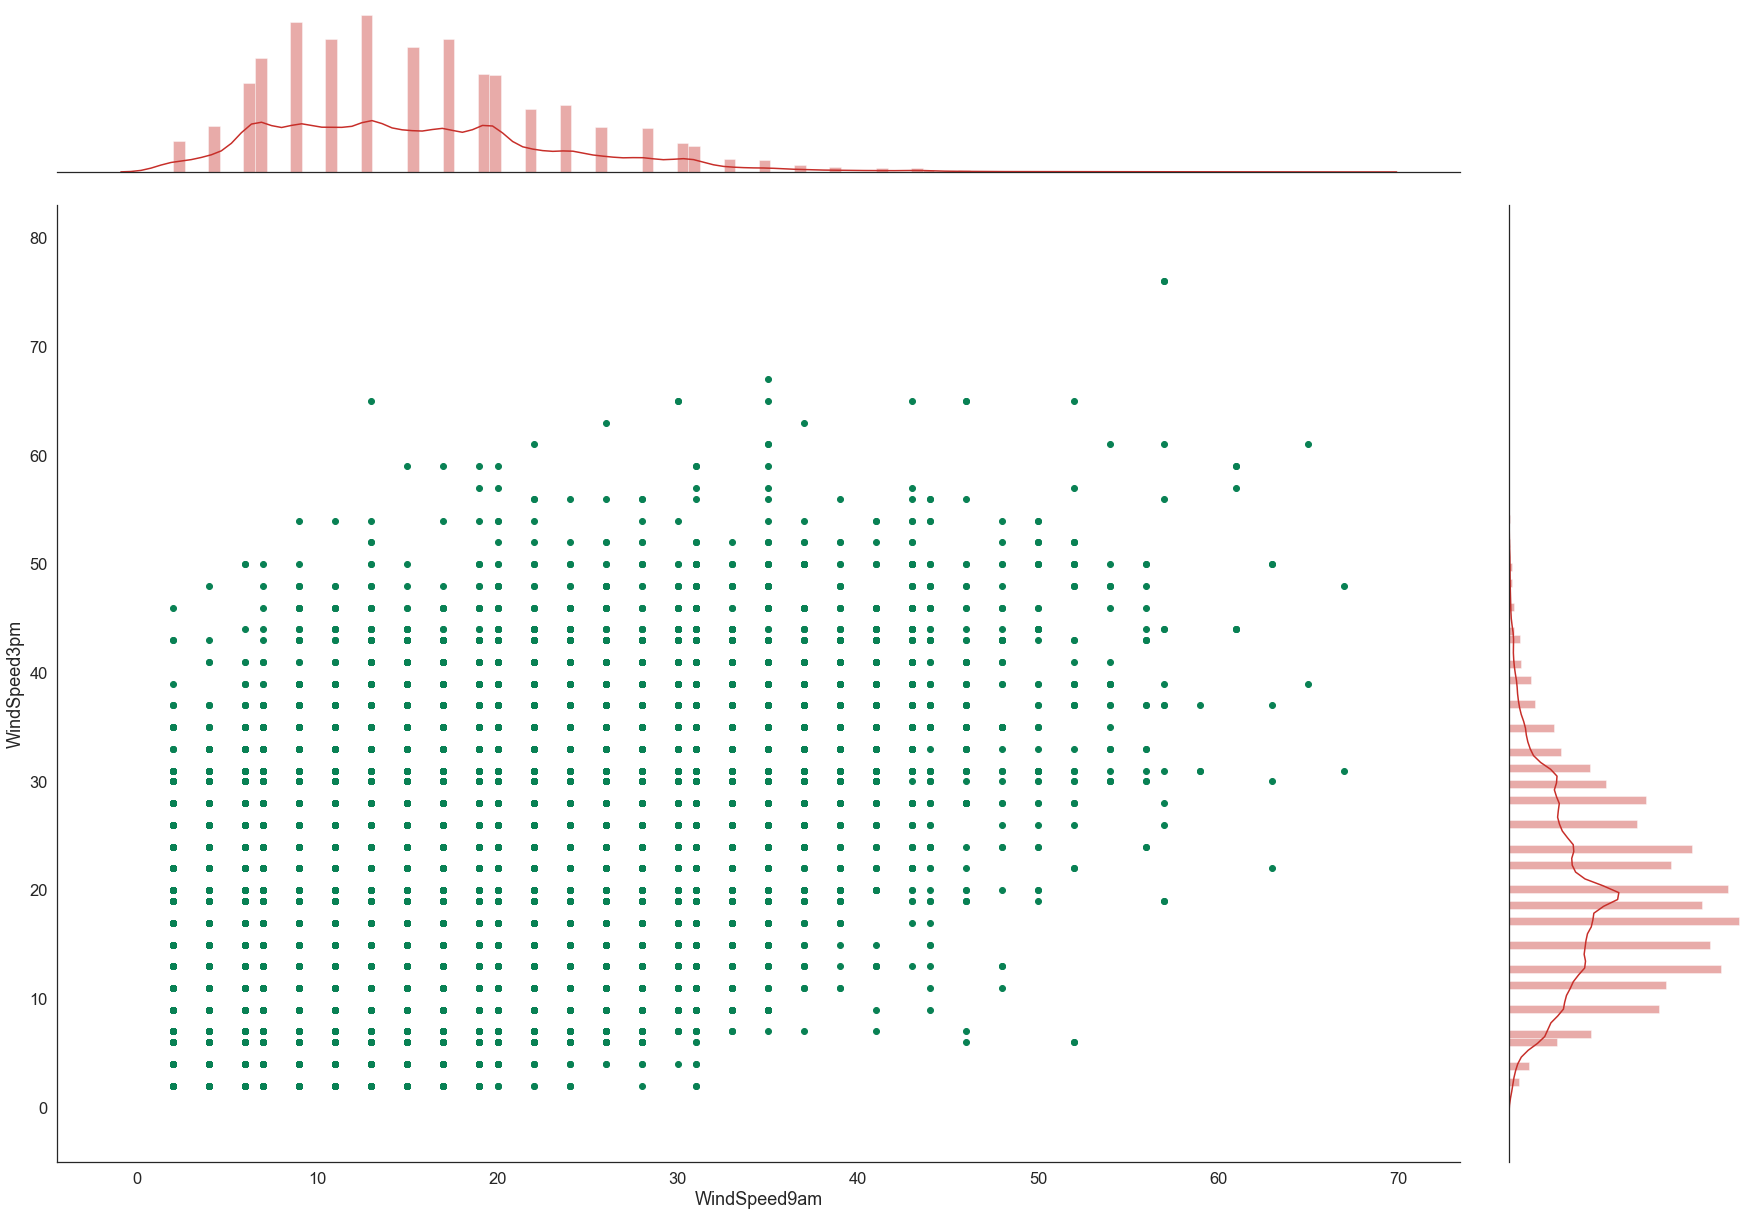

In [23]:
# The histogram and scatter plot of WindSpeed9am and WindSpeed3pm
sns.set(style="white",font_scale=1.5) 
g = sns.jointplot(x='WindSpeed9am', y='WindSpeed3pm', data=dataset_important, 
                 color='#098154', 
                 marginal_kws=dict(bins=100,  
                                    kde=True, 
                                    color='#c72e29',                         
                                   ),
                 )
g.fig.set_size_inches(30,20) 

According to Kolmogorov-Smirnov test, we find that the WindSpeed9am and WindSpeed3pm are not the normal distribution, from the histogram and scatter plot above, we can find that the The distribution of points is uneven, and for the nuclear density map, it is also different from the normal distribution, I think because the Wind speed is unpredictable, even the changes in the same day are also very large, and different area the climate are very different, the speed of an area might conforms to the normal distribution

WindDir9am
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
Name: WindSpeed9am, dtype: object

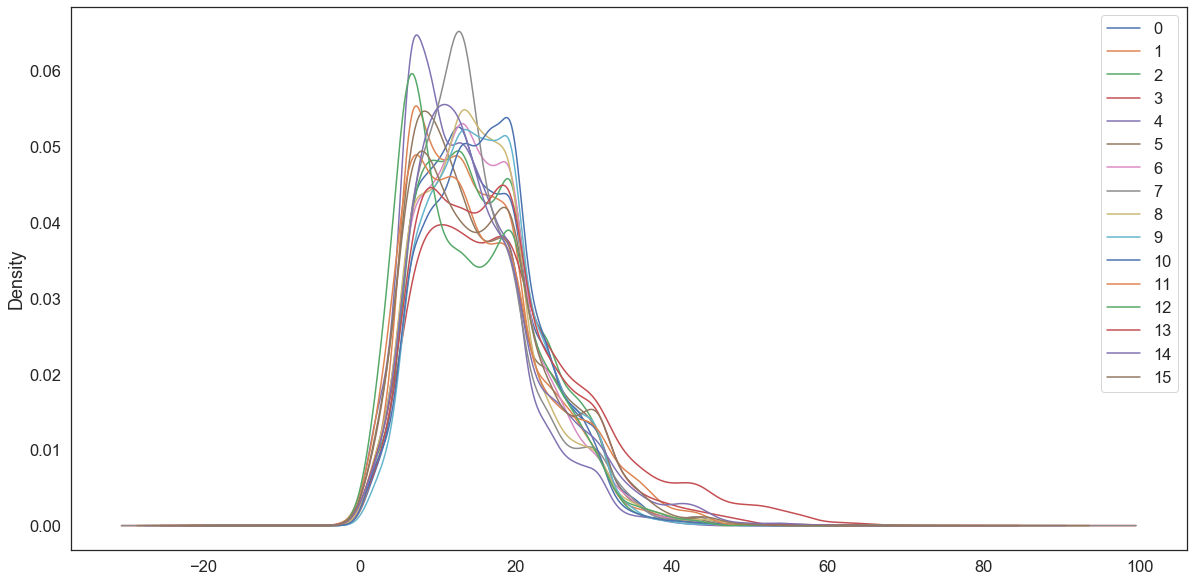

In [24]:
dataset_important.groupby('WindDir9am')['WindSpeed9am'].plot(kind='kde', legend=True, figsize=(20, 10))

WindDir3pm
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
Name: WindSpeed3pm, dtype: object

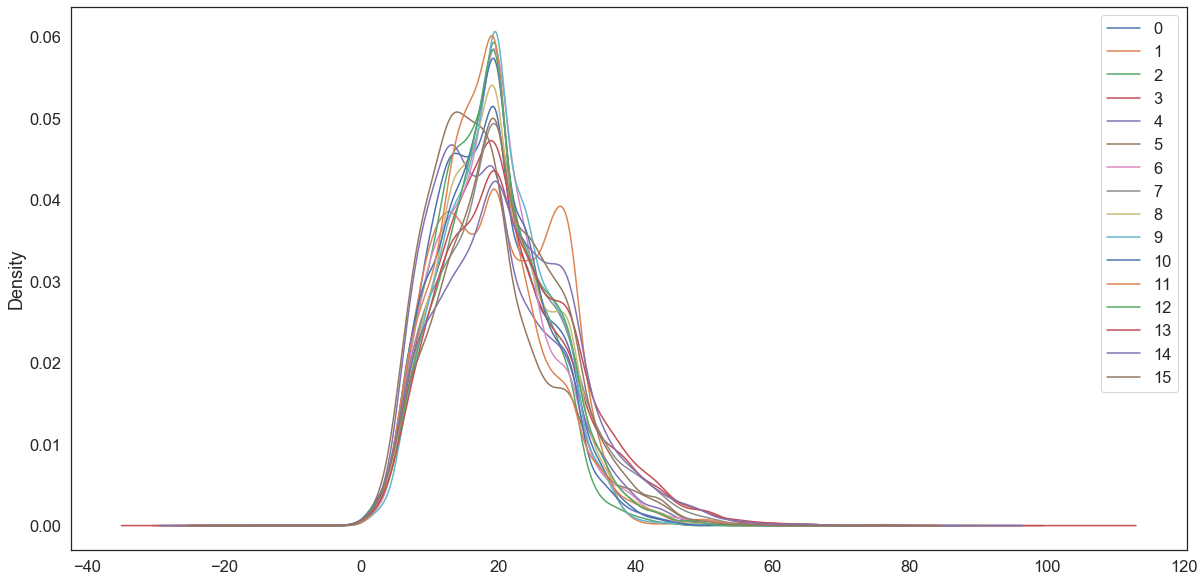

In [25]:
dataset_important.groupby('WindDir3pm')['WindSpeed3pm'].plot(kind='kde', legend=True, figsize=(20, 10))

We group the Wind Speed by the Wind Dirction and find that the distribution of the windSpeed still complex, but we can see the curves are more similiar to the normal distribution than the curve without grouping. So, I think the distribution of windSpeed is Mixed Gaussian distribution, but the parameters are currently unknown

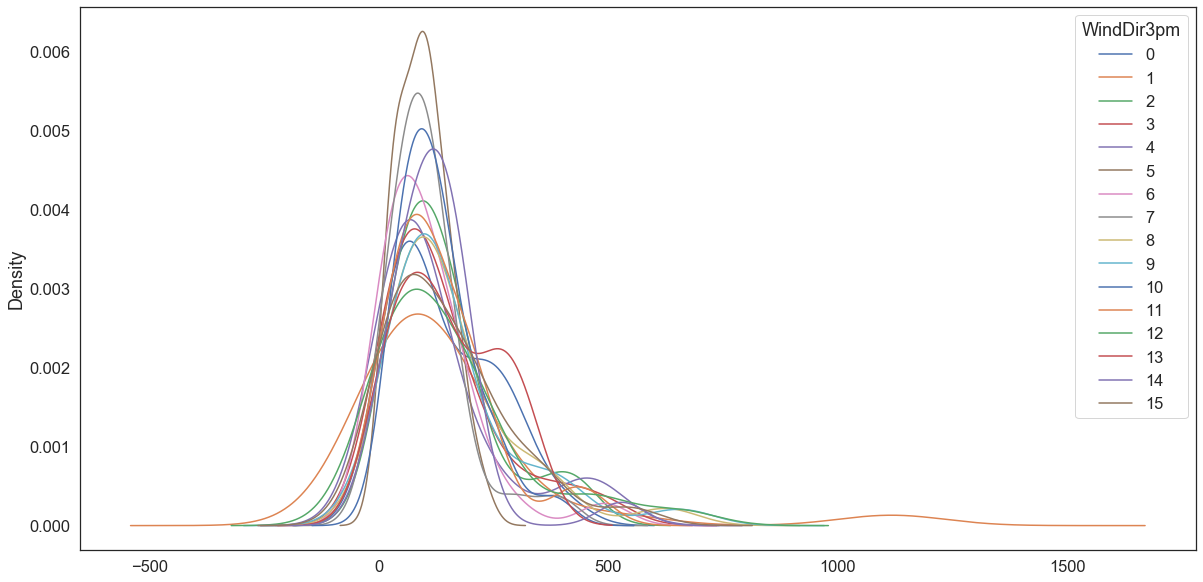

In [26]:
group =  dataset_important.groupby(['Location', 'WindDir3pm']).count()
(group['WindSpeed3pm'].unstack()).plot(kind='kde', legend=True, figsize=(20, 10))
# ['WindSpeed3pm'].plot(kind='kde', legend=True, figsize=(20, 10))

we can see, when we group the Wind speed with Wind Direction and Location, the curves are more similiar with the normal distribution, therefore,  windSpeed is Mixed Gaussian distribution.

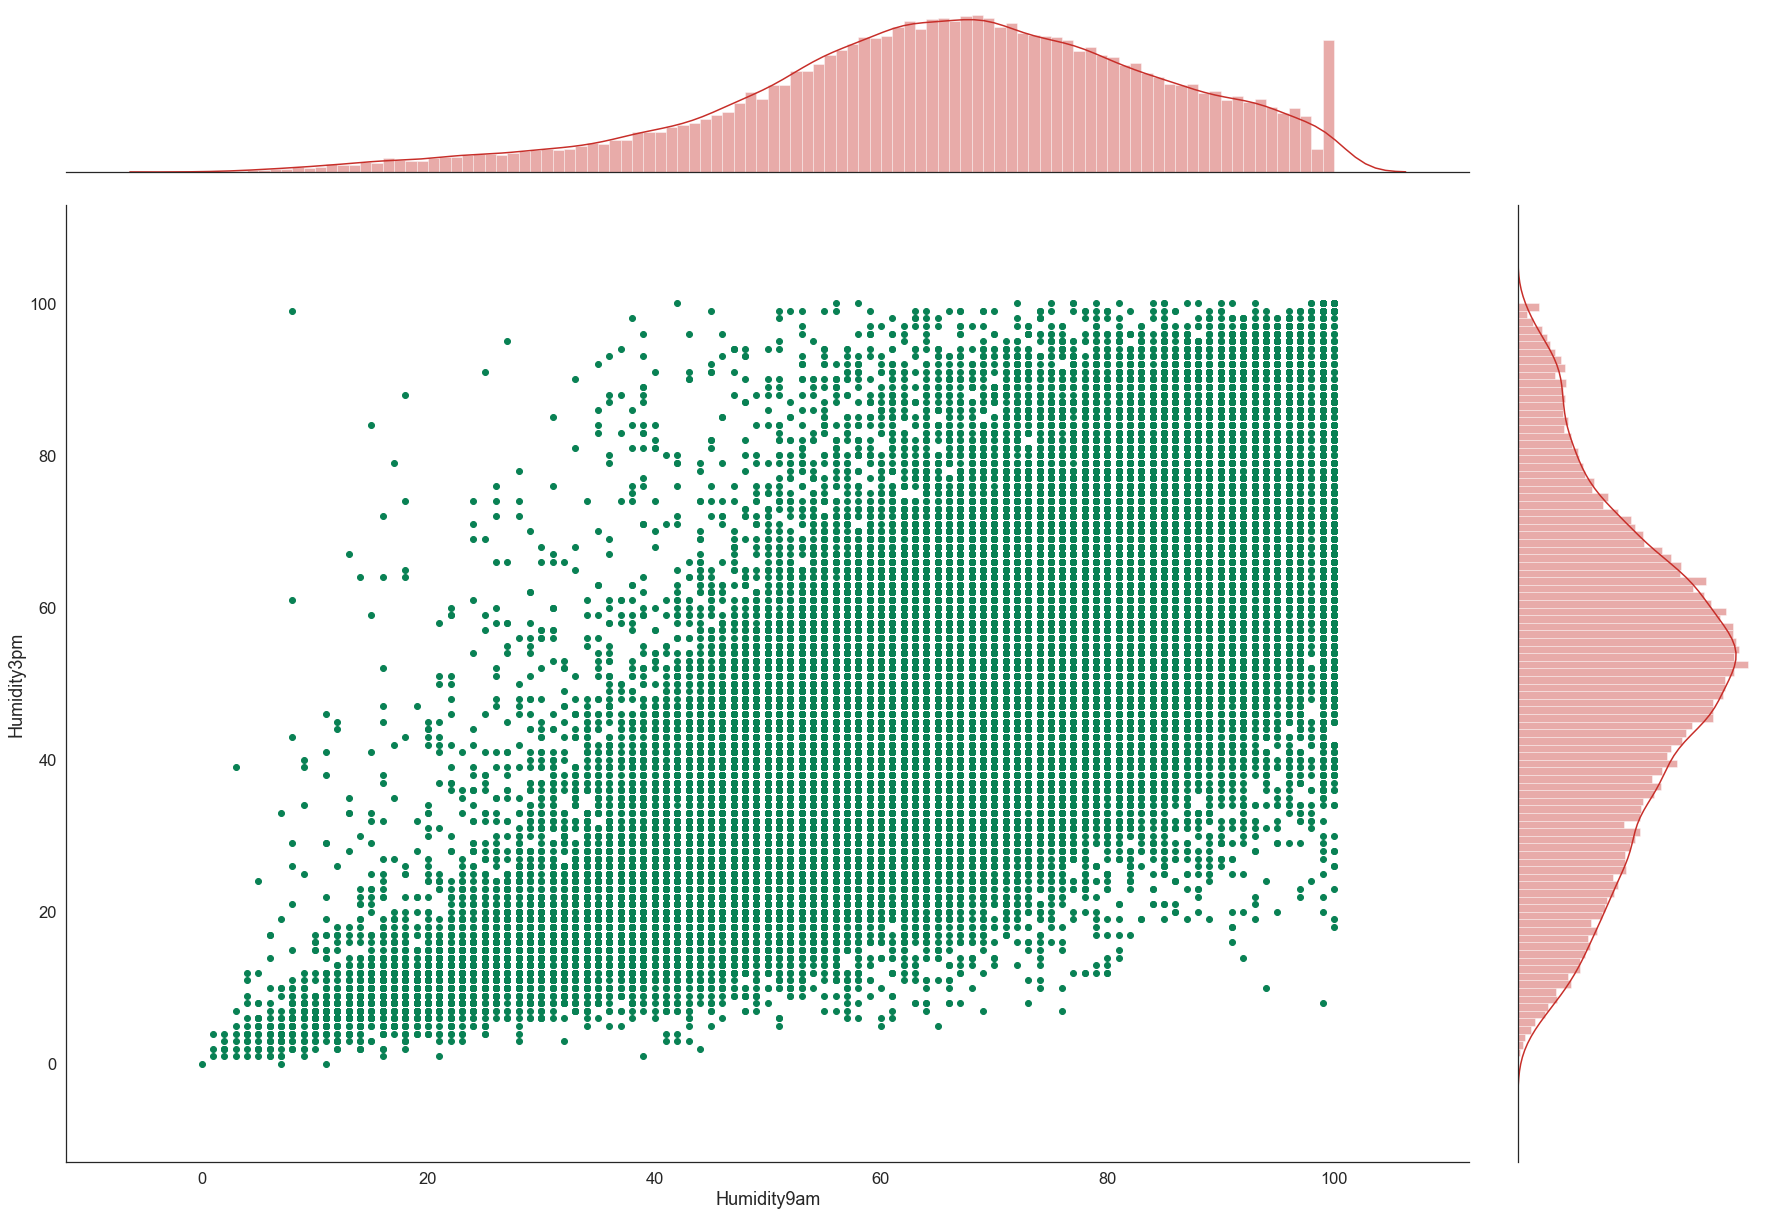

In [27]:
# The histogram and scatter plot of Humidity9am and Humidity3pm
sns.set(style="white",font_scale=1.5) 
g = sns.jointplot(x='Humidity9am', y='Humidity3pm', data=dataset_important, 
                 color='#098154', 
                 marginal_kws=dict(bins=100,  
                                    kde=True, 
                                    color='#c72e29',                         
                                   ),
                 )
g.fig.set_size_inches(30,20) 

We can't find some special relation from the scatter plots, but from the histogram plots, we find the curves are very similiar with the normal distribution, Kolmogorov-Smirnov test also   show that the Humidity is normal distribution.

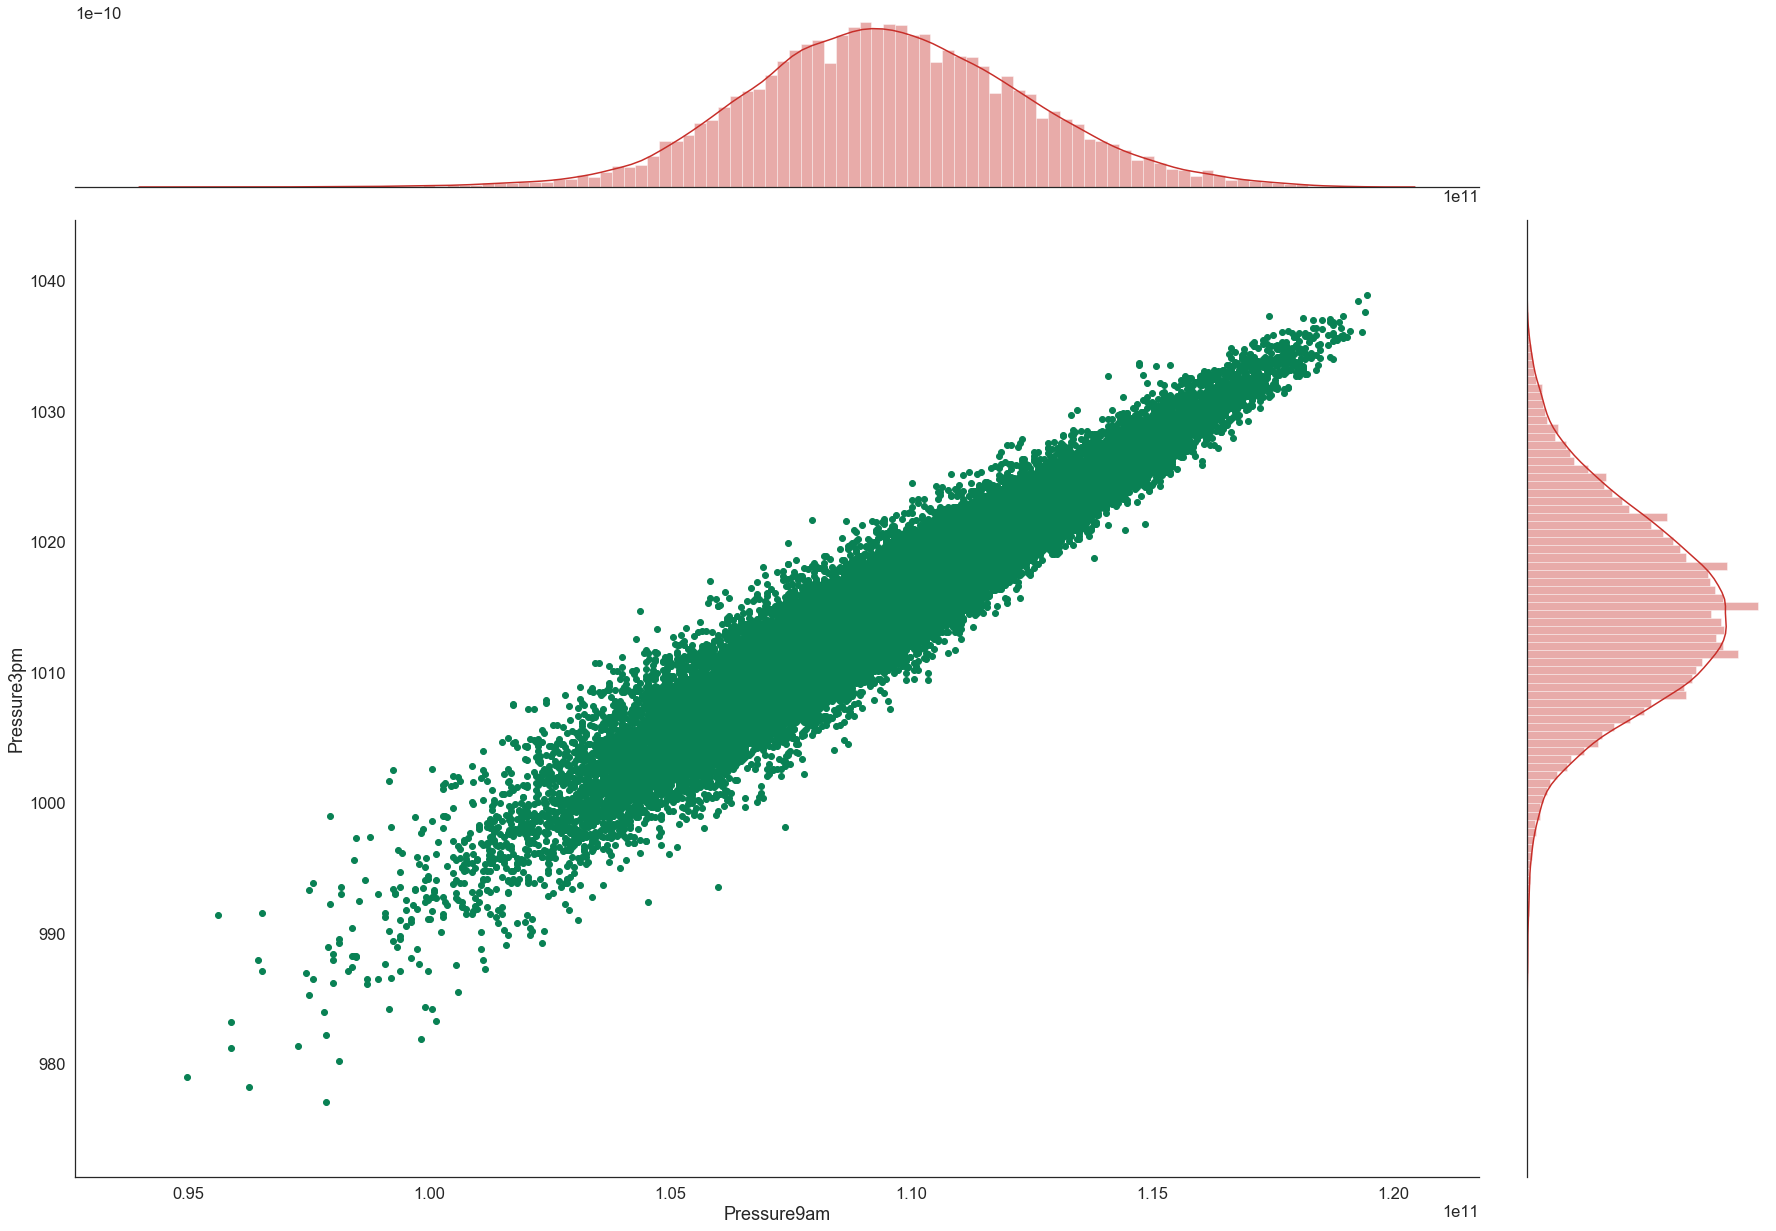

In [28]:
# The histogram and scatter plot of Pressure9am and Pressure3pm
sns.set(style="white",font_scale=1.5) 
g = sns.jointplot(x='Pressure9am', y='Pressure3pm', data=dataset_important, 
                 color='#098154', 
                 marginal_kws=dict(bins=100,  
                                    kde=True, 
                                    color='#c72e29',                         
                                   ),
                 )
g.fig.set_size_inches(30,20)

In [29]:
print(stats.normaltest(dataset_important['Pressure9am']))
print(stats.normaltest(dataset_important['Pressure3pm']))

NormaltestResult(statistic=122.270595258593, pvalue=2.8136987010328092e-27)
NormaltestResult(statistic=84.18277917340026, pvalue=5.247370952307066e-19)


1. From the scatter plot, we cloud find that the Pressure9am and Pressure3pm are linearly dependent, and some point are noise of the data, I think these noise might come from some original data are lost, so, I replace them with the means, and the lost data is little.   
2. Kolmogorov-Smirnov test also show that the Pressure9am and Pressure3pm are not the normal distribution, but from the histogram plots, we find the curves are similiar with the normal distribution, so, we add a Normaltest, and find that Pressure3pm is normal distribution, but Pressure9am isn't, I think the Pressure9am is also normal distribution, but the noise have a lot influence to it, so, the P-value is too small.


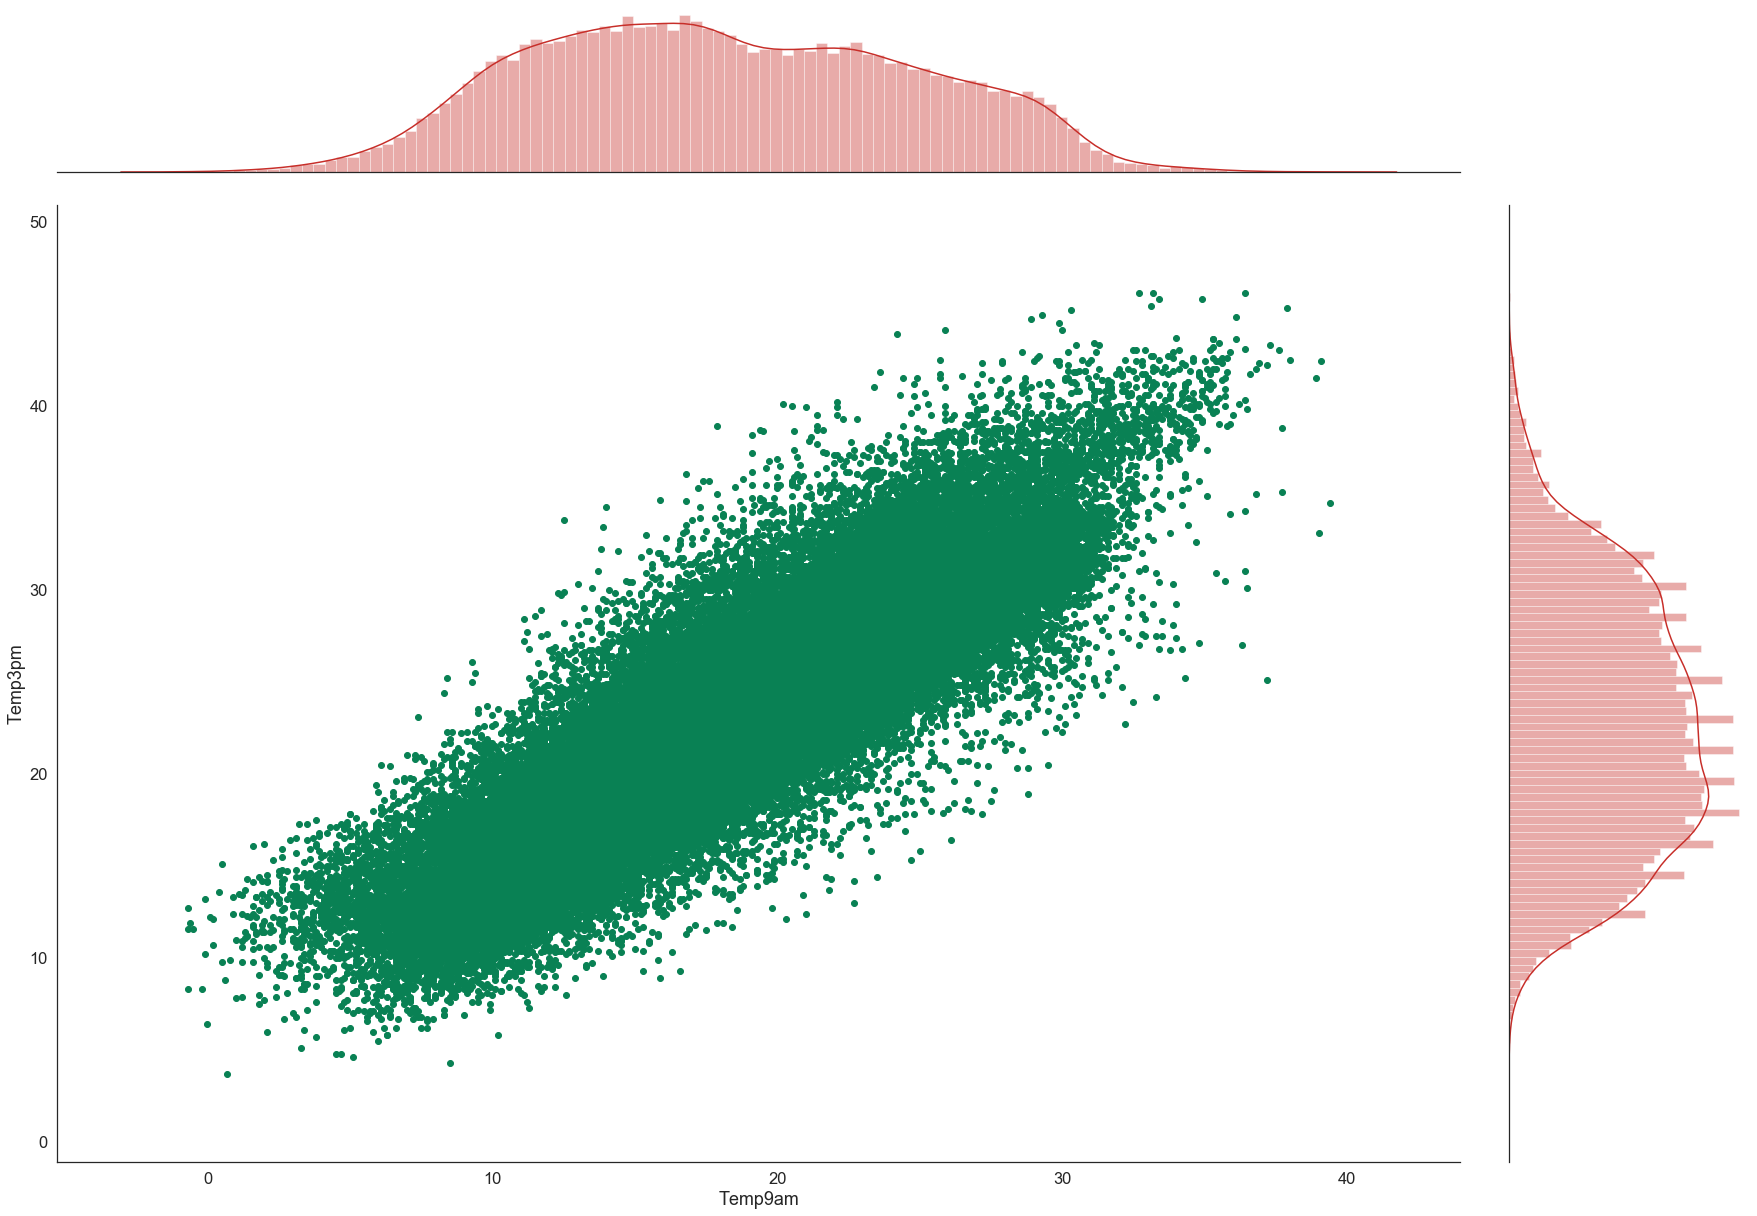

In [30]:
# The histogram and scatter plot of Temp9am and Temp3pm
sns.set(style="white",font_scale=1.5) 
g = sns.jointplot(x='Temp9am', y='Temp3pm', data=dataset_important, 
                 color='#098154', 
                 marginal_kws=dict(bins=100,  
                                    kde=True, 
                                    color='#c72e29',                         
                                   ),
                 )
g.fig.set_size_inches(30,20)

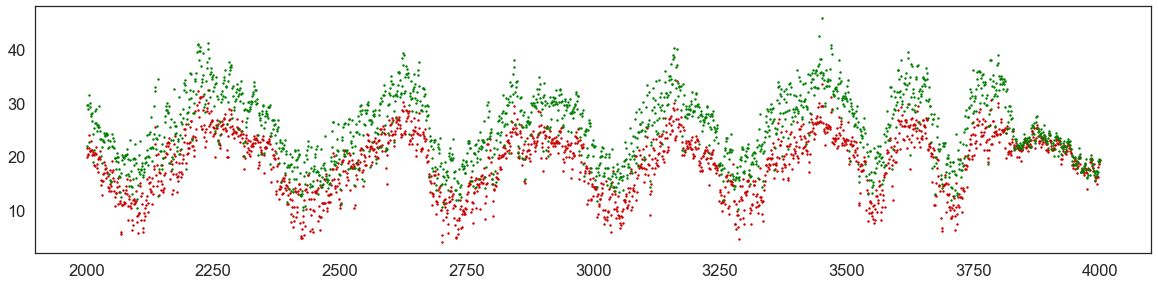

In [31]:
Temp9am = dataset_important['Temp9am']
Temp3pm = dataset_important['Temp3pm']
Temp9am = Temp9am[2000:4000]
Temp3pm = Temp3pm[2000:4000]
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,1,1)  
ax1.scatter(Temp9am.index, Temp9am.values, s =2,color=(0.8,0.,0.) )
plt.grid()

ax1 = fig.add_subplot(2,1,1)  
ax1.scatter(Temp3pm.index, Temp3pm.values, s= 2, color=(0.,0.5,0.))
plt.grid()


1. Kolmogorov-Smirnov test show that the Temp9am and Temp3pm are the normal distribution, we can also get it from the histogram and scatter plot, we can also find that Temp3pm and Temp9am are ilinearly dependent.   
2. For the scatter plot, some points also deviate from the line, but we then add a scatter that show some points in the data, and find that these wrong points are randomly distributed, these points come from the noise of the data.

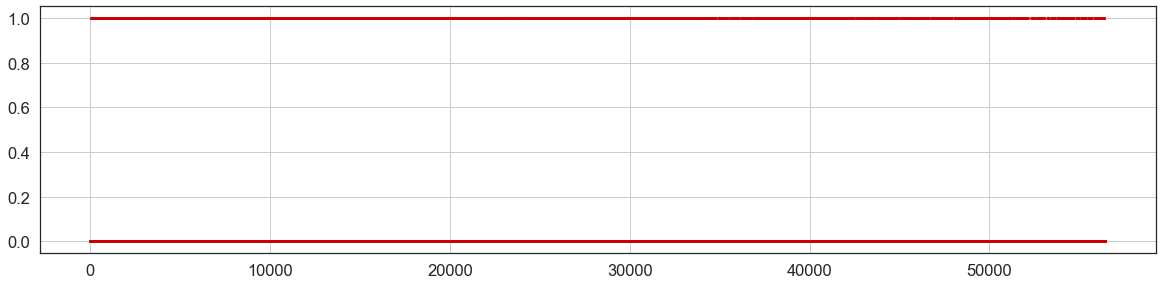

In [32]:
RainToday = dataset_important['RainToday']
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,1,1)  
ax1.scatter(RainToday.index, RainToday.values, s =2,color=(0.8,0.,0.) )
plt.grid()


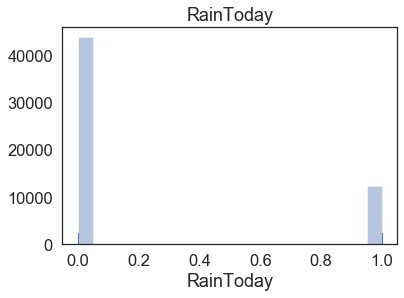

In [33]:
sns.distplot(RainToday, bins=20, hist=True, kde=False, norm_hist=False, rug=True,
             vertical=False, axlabel=None, label=None, ax=None,
             fit=None)
plt.title('RainToday')
plt.show()

What we can see is that the sunny day are more than the rainy day in Australia.

## Conclusion
We analyze the data of daily weather observations from many locations across Australia. And find that some important variables, such as locayion, Temperature, Humidity, and find that also all the numerical variables are normal distribution, even some complex variables are Mixed Gaussian distribution, for some Weird point in the scatter plots, they are the result of the noise in the data, and have little influence on data